In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("mlops_dataset.csv")

In [3]:
data.head()

,experiment_id,run_date,model_architecture,dataset_name,dataset_version,learning_rate,batch_size,epochs,accuracy,precision,recall,f1_score,training_time_minutes,hardware_used,environment_details,notes
0,exp_0001,2023-08-17,XGBoost,ImageNet,3.0,0.00031,128,81,0.9659,0.9891,0.9758,0.9824,968,Cloud TPU,Windows 10 Python3.8,optimizer comparison
1,exp_0002,2023-02-21,SVM,ImageNet,1.0,0.00004,256,39,0.5764,0.5322,0.6130,0.5697,1584,Edge Device,Windows 10 Python3.8,tuned hyperparameters
2,exp_0003,2024-07-17,Transformer,IMDB,2.0,0.00254,128,5,0.8470,0.7991,0.8940,0.8439,1963,Edge Device,AWS EC2 Python3.10,regularization test
3,exp_0004,2024-05-16,XGBoost,SVHN,2.0,0.02137,256,18,0.6040,0.5722,0.5723,0.5722,1792,Edge Device,Windows 10 Python3.8,optimizer comparison
4,exp_0005,2024-04-02,XGBoost,CIFAR10,2.0,0.00016,64,25,0.7571,0.7503,0.7362,0.7432,1114,Cloud TPU,Ubuntu 20.04 Python3.8,loss function experiment


In [4]:
data.isna().any()

experiment_id            False
run_date                 False
model_architecture       False
dataset_name             False
dataset_version          False
learning_rate            False
batch_size               False
epochs                   False
accuracy                 False
precision                False
recall                   False
f1_score                 False
training_time_minutes    False
hardware_used            False
environment_details      False
notes                    False
dtype: bool

In [5]:
data["environment_details"]

0        Windows 10 Python3.8
1        Windows 10 Python3.8
2          AWS EC2 Python3.10
3        Windows 10 Python3.8
4      Ubuntu 20.04 Python3.8
               ...           
95    GCP Container Python3.7
96     Ubuntu 22.04 Python3.9
97    GCP Container Python3.7
98         MacOS 12 Python3.9
99         MacOS 12 Python3.9
Name: environment_details, Length: 100, dtype: object

In [6]:
data["Python_Version"]=[i.split(" ")[2]for i in data["environment_details"]]
data

,experiment_id,run_date,model_architecture,dataset_name,dataset_version,learning_rate,batch_size,epochs,accuracy,precision,recall,f1_score,training_time_minutes,hardware_used,environment_details,notes,Python_Version
0,exp_0001,2023-08-17,XGBoost,ImageNet,3.0,0.00031,128,81,0.9659,0.9891,0.9758,0.9824,968,Cloud TPU,Windows 10 Python3.8,optimizer comparison,Python3.8
1,exp_0002,2023-02-21,SVM,ImageNet,1.0,0.00004,256,39,0.5764,0.5322,0.6130,0.5697,1584,Edge Device,Windows 10 Python3.8,tuned hyperparameters,Python3.8
2,exp_0003,2024-07-17,Transformer,IMDB,2.0,0.00254,128,5,0.8470,0.7991,0.8940,0.8439,1963,Edge Device,AWS EC2 Python3.10,regularization test,Python3.10
3,exp_0004,2024-05-16,XGBoost,SVHN,2.0,0.02137,256,18,0.6040,0.5722,0.5723,0.5722,1792,Edge Device,Windows 10 Python3.8,optimizer comparison,Python3.8
4,exp_0005,2024-04-02,XGBoost,CIFAR10,2.0,0.00016,64,25,0.7571,0.7503,0.7362,0.7432,1114,Cloud TPU,Ubuntu 20.04 Python3.8,loss function experiment,Python3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,exp_0096,2023-04-07,SVM,Custom,3.0,0.00003,64,77,0.8414,0.8543,0.8791,0.8665,1281,CPU,GCP Container Python3.7,tuned hyperparameters,Python3.7
96,exp_0097,2023-08-13,SVM,CIFAR10,2.0,0.00872,64,89,0.8937,0.8719,0.8614,0.8666,176,GPU,Ubuntu 22.04 Python3.9,data augmentation,Python3.9
97,exp_0098,2023-11-10,XGBoost,ImageNet,2.0,0.01006,16,57,0.8953,0.9444,0.8866,0.9146,932,Edge Device,GCP Container Python3.7,feature scaling applied,Python3.7
98,exp_0099,2023-11-24,Transformer,ImageNet,2.0,0.00031,64,95,0.8804,0.8645,0.9235,0.8930,589,Edge Device,MacOS 12 Python3.9,tuned hyperparameters,Python3.9


In [9]:
data["OS"]=[i.split(" ")[:2]for i in data["environment_details"]]
data["OS"]=[i.split("Python")[0] for i in data["environment_details"]]
data

,experiment_id,run_date,model_architecture,dataset_name,dataset_version,learning_rate,batch_size,epochs,accuracy,precision,recall,f1_score,training_time_minutes,hardware_used,environment_details,notes,Python_Version,OS
0,exp_0001,2023-08-17,XGBoost,ImageNet,3.0,0.00031,128,81,0.9659,0.9891,0.9758,0.9824,968,Cloud TPU,Windows 10 Python3.8,optimizer comparison,Python3.8,Windows 10
1,exp_0002,2023-02-21,SVM,ImageNet,1.0,0.00004,256,39,0.5764,0.5322,0.6130,0.5697,1584,Edge Device,Windows 10 Python3.8,tuned hyperparameters,Python3.8,Windows 10
2,exp_0003,2024-07-17,Transformer,IMDB,2.0,0.00254,128,5,0.8470,0.7991,0.8940,0.8439,1963,Edge Device,AWS EC2 Python3.10,regularization test,Python3.10,AWS EC2
3,exp_0004,2024-05-16,XGBoost,SVHN,2.0,0.02137,256,18,0.6040,0.5722,0.5723,0.5722,1792,Edge Device,Windows 10 Python3.8,optimizer comparison,Python3.8,Windows 10
4,exp_0005,2024-04-02,XGBoost,CIFAR10,2.0,0.00016,64,25,0.7571,0.7503,0.7362,0.7432,1114,Cloud TPU,Ubuntu 20.04 Python3.8,loss function experiment,Python3.8,Ubuntu 20.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,exp_0096,2023-04-07,SVM,Custom,3.0,0.00003,64,77,0.8414,0.8543,0.8791,0.8665,1281,CPU,GCP Container Python3.7,tuned hyperparameters,Python3.7,GCP Container
96,exp_0097,2023-08-13,SVM,CIFAR10,2.0,0.00872,64,89,0.8937,0.8719,0.8614,0.8666,176,GPU,Ubuntu 22.04 Python3.9,data augmentation,Python3.9,Ubuntu 22.04
97,exp_0098,2023-11-10,XGBoost,ImageNet,2.0,0.01006,16,57,0.8953,0.9444,0.8866,0.9146,932,Edge Device,GCP Container Python3.7,feature scaling applied,Python3.7,GCP Container
98,exp_0099,2023-11-24,Transformer,ImageNet,2.0,0.00031,64,95,0.8804,0.8645,0.9235,0.8930,589,Edge Device,MacOS 12 Python3.9,tuned hyperparameters,Python3.9,MacOS 12


In [8]:
data

,experiment_id,run_date,model_architecture,dataset_name,dataset_version,learning_rate,batch_size,epochs,accuracy,precision,recall,f1_score,training_time_minutes,hardware_used,environment_details,notes,Python_Version,OS
0,exp_0001,2023-08-17,XGBoost,ImageNet,3.0,0.00031,128,81,0.9659,0.9891,0.9758,0.9824,968,Cloud TPU,Windows 10 Python3.8,optimizer comparison,Python3.8,"[Windows 10 , 3.8]"
1,exp_0002,2023-02-21,SVM,ImageNet,1.0,0.00004,256,39,0.5764,0.5322,0.6130,0.5697,1584,Edge Device,Windows 10 Python3.8,tuned hyperparameters,Python3.8,"[Windows 10 , 3.8]"
2,exp_0003,2024-07-17,Transformer,IMDB,2.0,0.00254,128,5,0.8470,0.7991,0.8940,0.8439,1963,Edge Device,AWS EC2 Python3.10,regularization test,Python3.10,"[AWS EC2 , 3.10]"
3,exp_0004,2024-05-16,XGBoost,SVHN,2.0,0.02137,256,18,0.6040,0.5722,0.5723,0.5722,1792,Edge Device,Windows 10 Python3.8,optimizer comparison,Python3.8,"[Windows 10 , 3.8]"
4,exp_0005,2024-04-02,XGBoost,CIFAR10,2.0,0.00016,64,25,0.7571,0.7503,0.7362,0.7432,1114,Cloud TPU,Ubuntu 20.04 Python3.8,loss function experiment,Python3.8,"[Ubuntu 20.04 , 3.8]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,exp_0096,2023-04-07,SVM,Custom,3.0,0.00003,64,77,0.8414,0.8543,0.8791,0.8665,1281,CPU,GCP Container Python3.7,tuned hyperparameters,Python3.7,"[GCP Container , 3.7]"
96,exp_0097,2023-08-13,SVM,CIFAR10,2.0,0.00872,64,89,0.8937,0.8719,0.8614,0.8666,176,GPU,Ubuntu 22.04 Python3.9,data augmentation,Python3.9,"[Ubuntu 22.04 , 3.9]"
97,exp_0098,2023-11-10,XGBoost,ImageNet,2.0,0.01006,16,57,0.8953,0.9444,0.8866,0.9146,932,Edge Device,GCP Container Python3.7,feature scaling applied,Python3.7,"[GCP Container , 3.7]"
98,exp_0099,2023-11-24,Transformer,ImageNet,2.0,0.00031,64,95,0.8804,0.8645,0.9235,0.8930,589,Edge Device,MacOS 12 Python3.9,tuned hyperparameters,Python3.9,"[MacOS 12 , 3.9]"


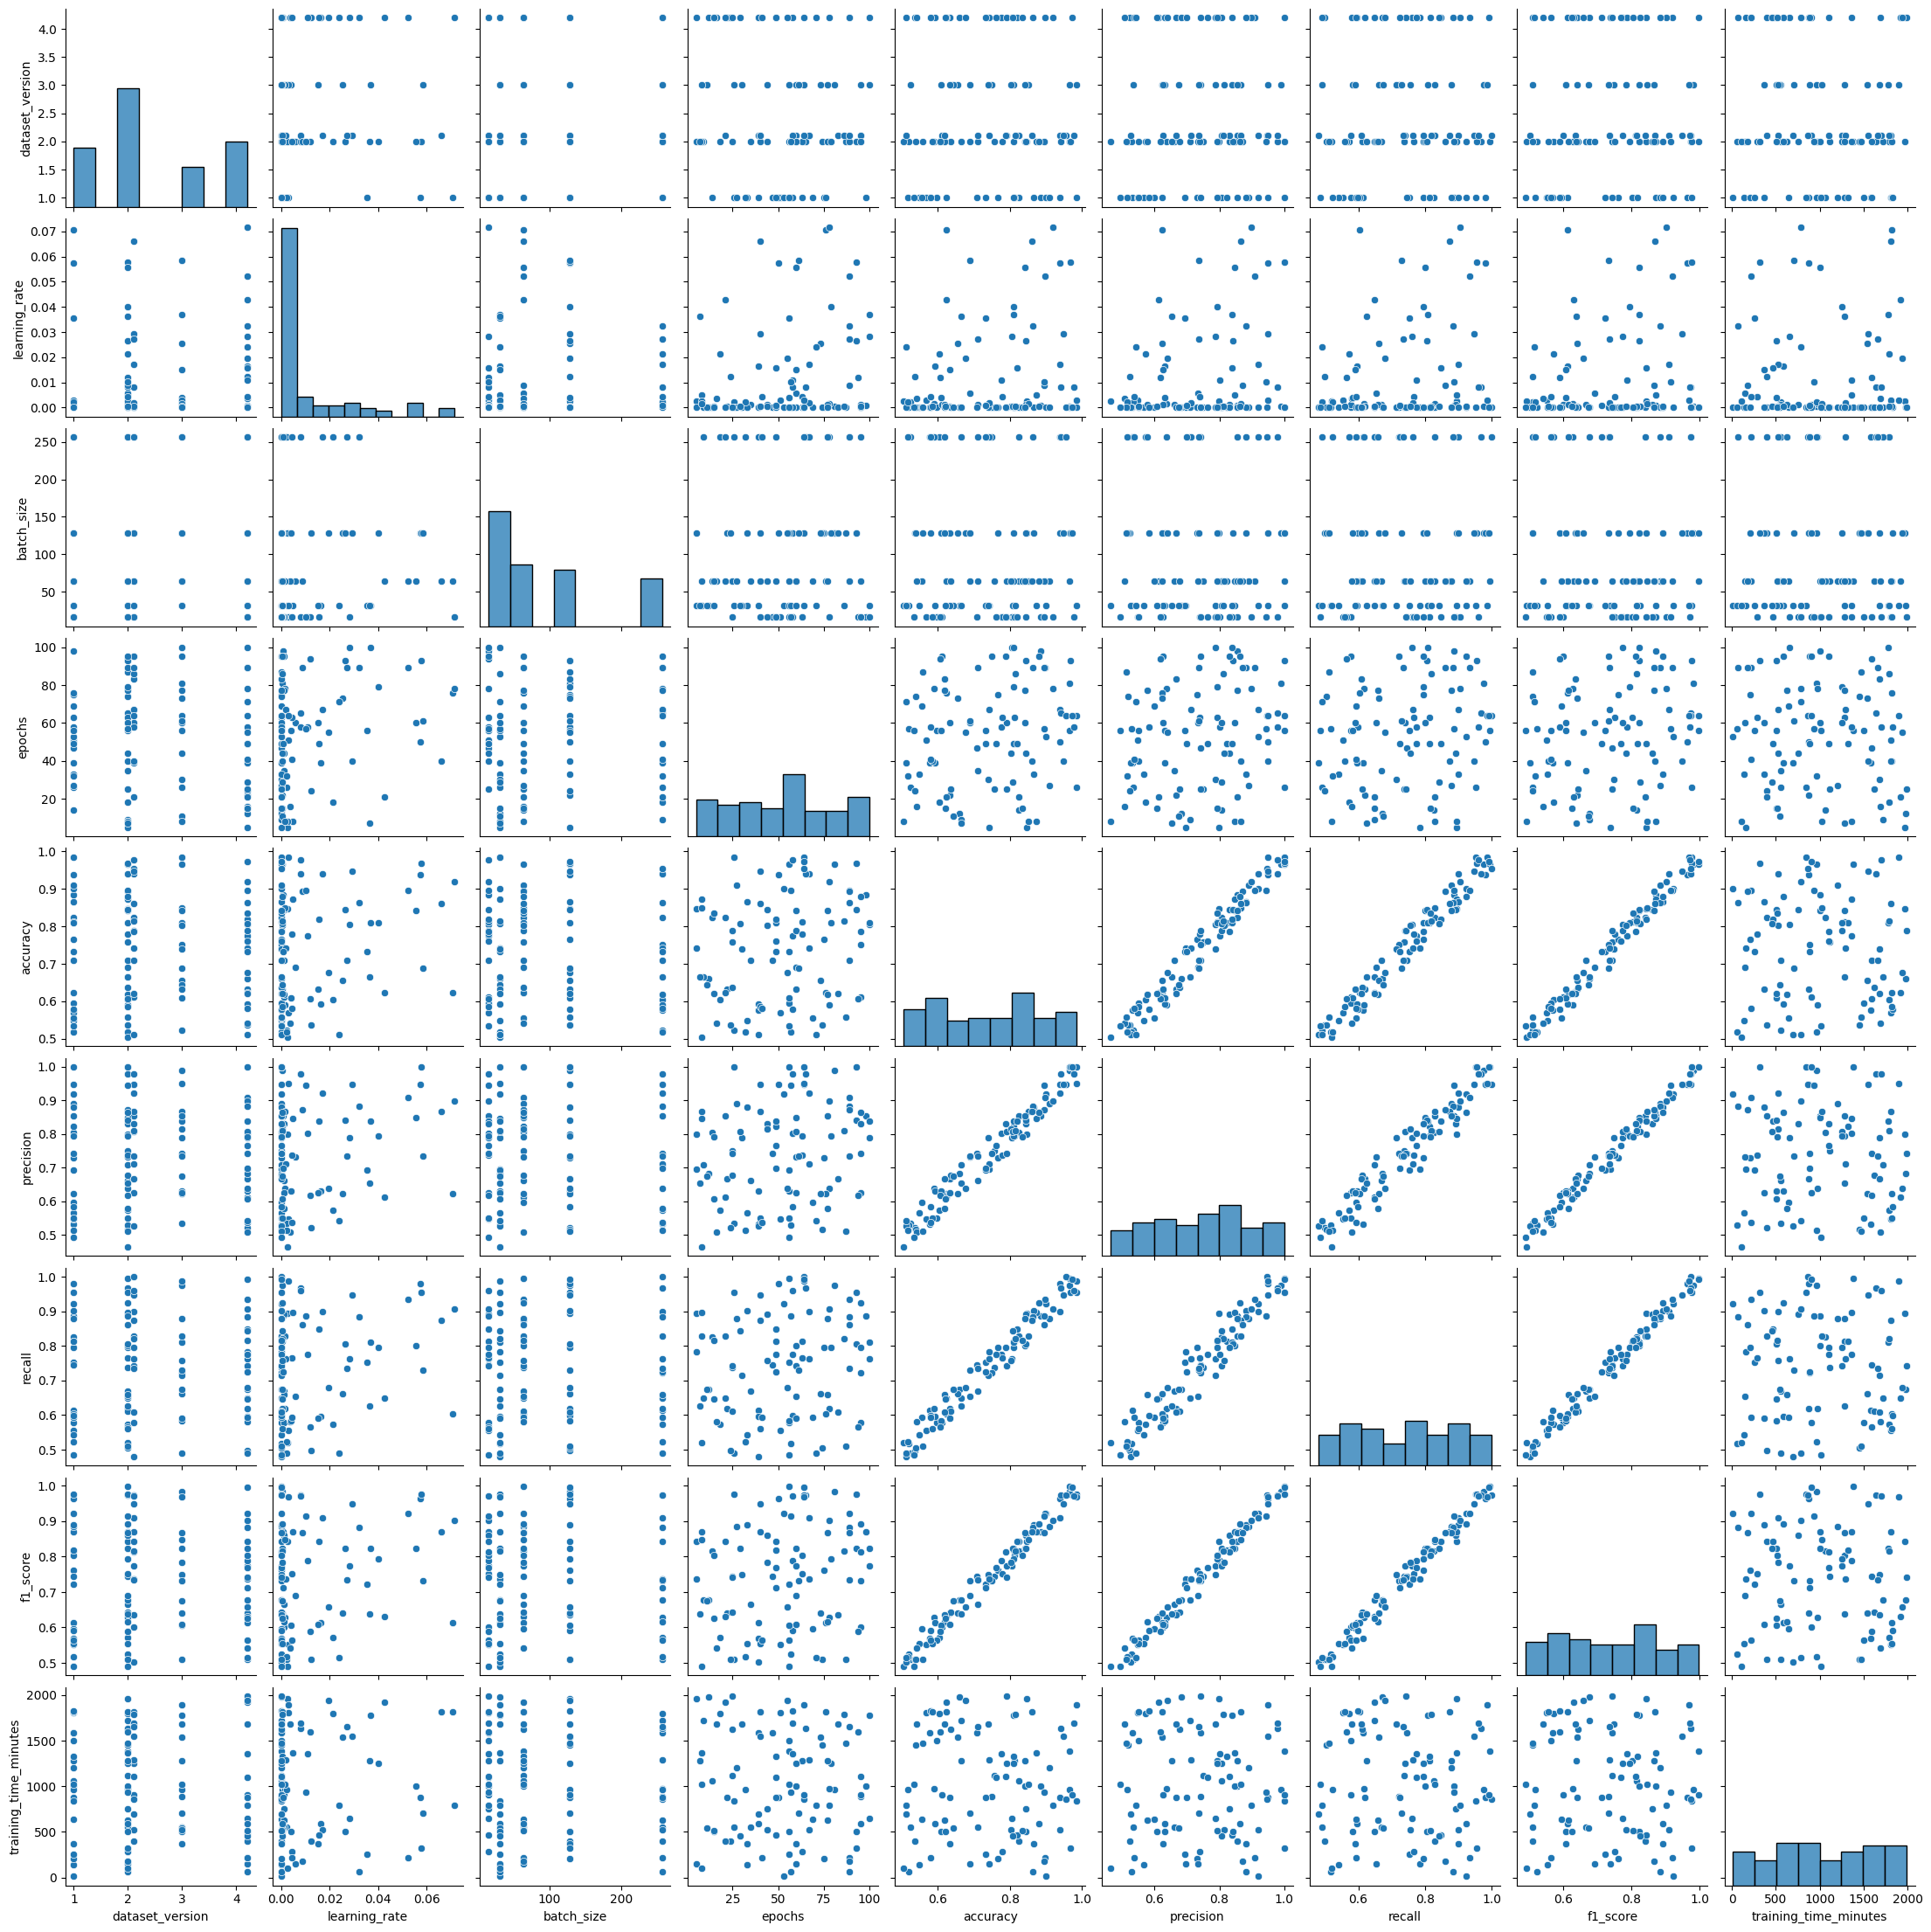

In [10]:
sns.pairplot(data)

<Axes: xlabel='accuracy', ylabel='f1_score'>

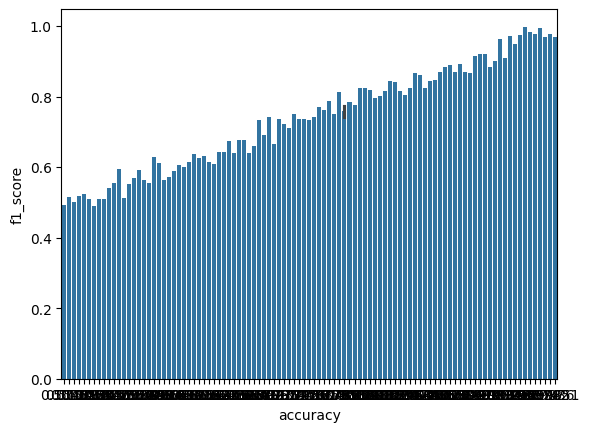

In [15]:
sns.barplot(data,x="accuracy",y="f1_score")

In [21]:
data.groupby("model_architecture")["accuracy"].mean()


model_architecture
CNN             0.759300
LSTM            0.821178
RandomForest    0.676550
ResNet          0.769463
SVM             0.756794
Transformer     0.705878
XGBoost         0.712742
Name: accuracy, dtype: float64

model_architecture
LSTM            0.821178
ResNet          0.769463
CNN             0.759300
SVM             0.756794
XGBoost         0.712742
Transformer     0.705878
RandomForest    0.676550
Name: accuracy, dtype: float64


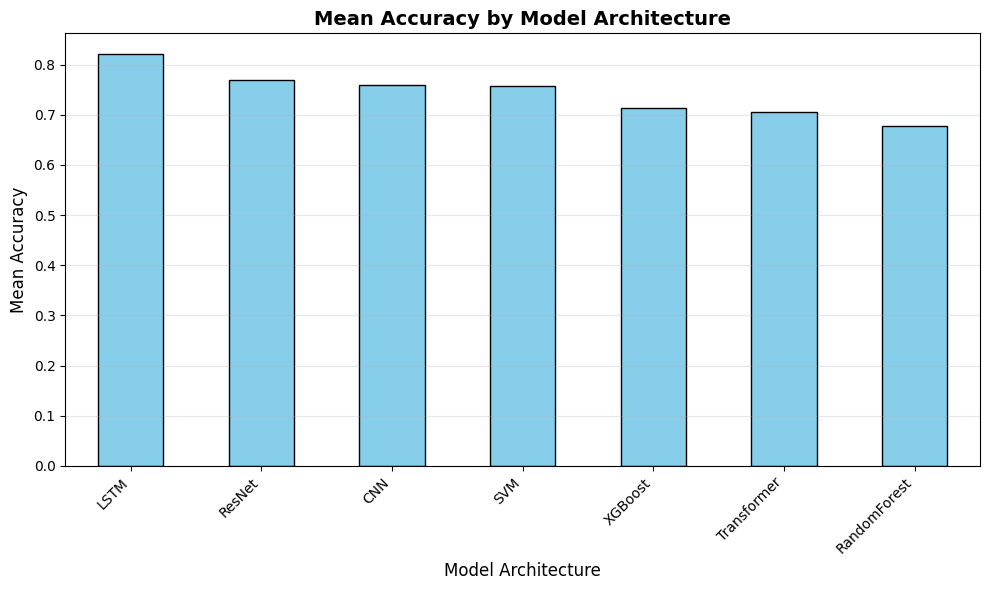

In [24]:
# Mean accuracy by model architecture
mean_accuracy = data.groupby("model_architecture")["accuracy"].mean().sort_values(ascending=False)
print(mean_accuracy)

# Visualize mean values with a bar plot
plt.figure(figsize=(10, 6))
mean_accuracy.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Accuracy by Model Architecture', fontsize=14, fontweight='bold')
plt.xlabel('Model Architecture', fontsize=12)
plt.ylabel('Mean Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipykernel_234797/3379041749.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='model_architecture', y='accuracy', palette='Set2')


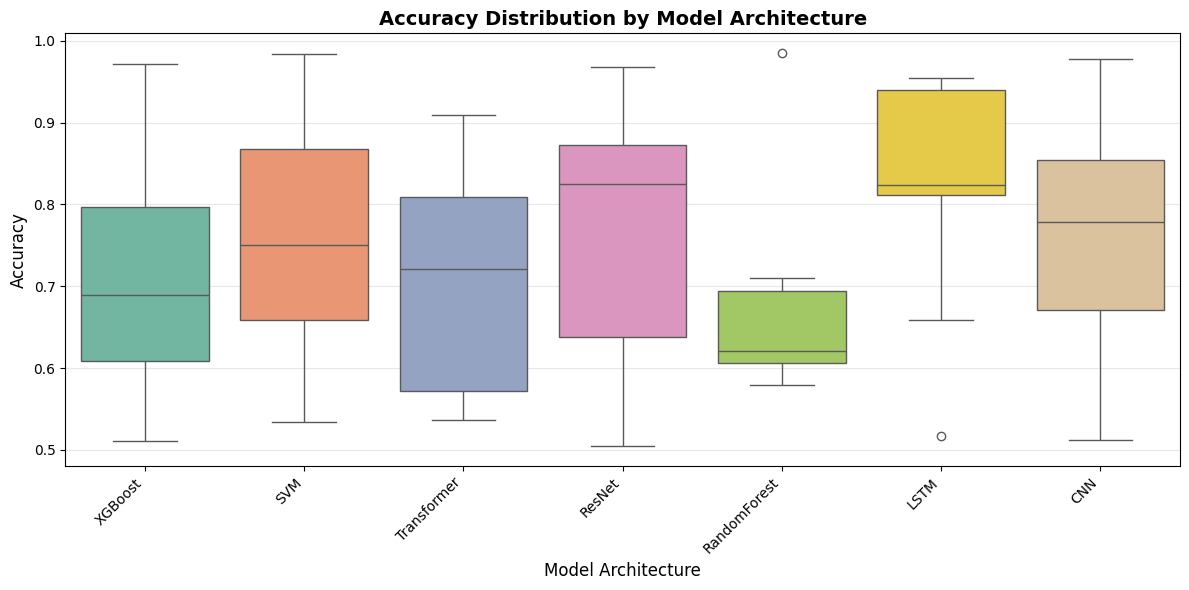

In [25]:
# Boxplot to show accuracy distribution by model architecture
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='model_architecture', y='accuracy', palette='Set2')
plt.title('Accuracy Distribution by Model Architecture', fontsize=14, fontweight='bold')
plt.xlabel('Model Architecture', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
best_result=data.groupby("dataset_name")['']